In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [77]:
# def plot(file):
#     df=pd.read_csv('./../data/composite_vars/' + file)
#     df['date'] = pd.to_datetime(df['date'])
#     df.set_index('date', inplace=True)
#     plt.figure(figsize=(14, 7))
#     plt.style.use('dark_background')
#     plt.title(file)
#     plt.plot(df.index, df[df.columns[0]])
#     plt.show()

df=pd.read_csv('./../data/composite_vars/NIM.csv')
# 
arr = ['LAS','NIA','OE','PR','ROA','SIZE']

for name in arr:
    gotten=pd.read_csv('./../data/composite_vars/'+name+".csv")
    df[gotten.columns[1]]=gotten[gotten.columns[1]]
# print(df)
Y=df['NIM']
X=df[arr]
model = sm.OLS(Y, X).fit()
# print(model.summary())
results = model.predict(X)
data = df["NIM"]

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


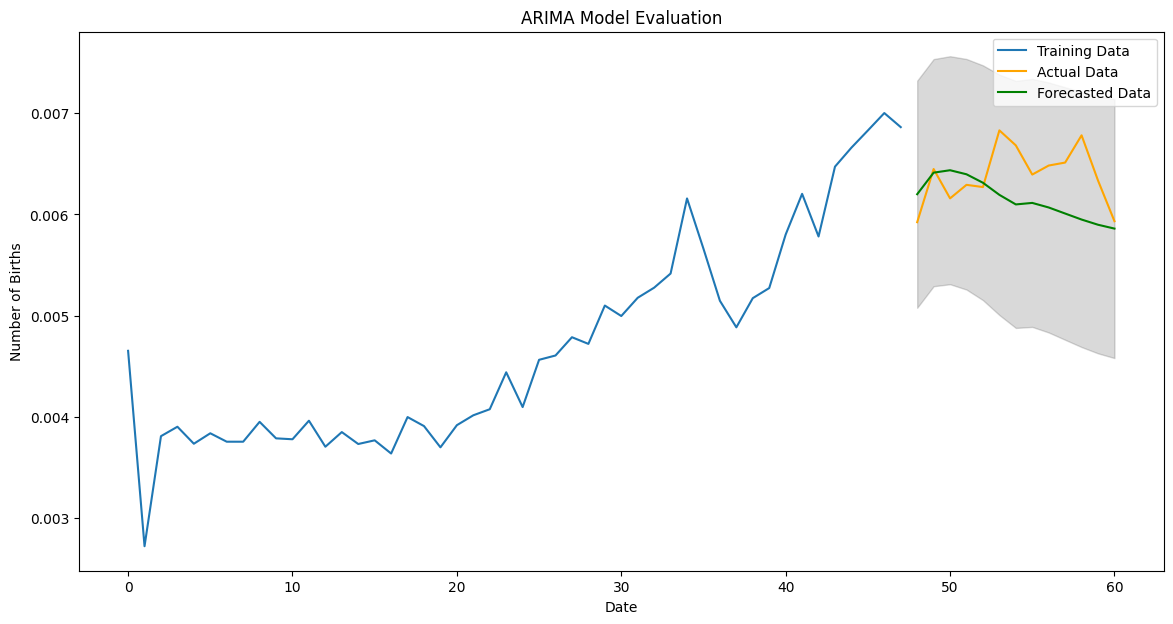

RMSE: 0.0004213339753433599


In [107]:
# Split the data into train and test
train_size = int(0.8*len(data))
train, test = data[0:train_size], data[train_size:len(data)]
# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(6, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test, test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)